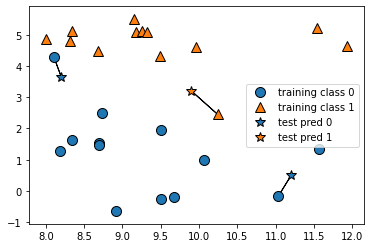

In [1]:
import mglearn

mglearn.plots.plot_knn_classification(n_neighbors=1)

## Load breast cancer data

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

cancer_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, random_state=42)

# 创建一个KNN模型
# create a KNN model
model = KNeighborsClassifier(n_neighbors=3)

# 拟合模型
# Fit the model
model.fit(X_train, y_train)

# 预测测试集
# make predictions
y_pred = model.predict(X_test)

# 查看准确度
# check the accuracy
print("Accuracy: {:.2f}".format(model.score(X_test, y_test)))


Accuracy: 0.93


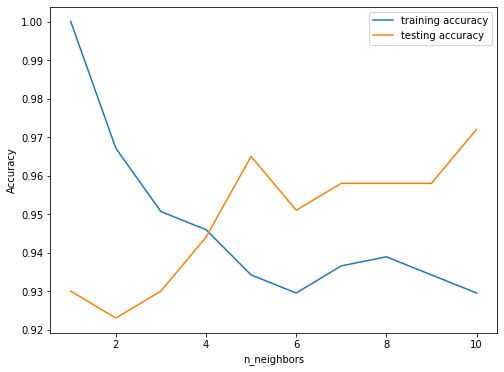

In [23]:
training_accuracy = []
test_accuracy = []

neighbor_settings = range(1, 11)

for neighbor in neighbor_settings:
    model = KNeighborsClassifier(n_neighbors=neighbor)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

plt.figure(figsize=(8,6))
plt.plot(neighbor_settings, training_accuracy, label="training accuracy")
plt.plot(neighbor_settings, test_accuracy, label="testing accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## Decision Boundary

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.patches as mpatches

def plot_two_class_knn(X, y, n_neighbors, X_test, y_test):
    X_mat = X
    y_mat = y

    # Create color maps
    cmap_light = ListedColormap(['#FFFFAA', '#AAFFAA', '#AAAAFF','#EFEFEF'])
    cmap_bold  = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    title = "Neighbors = {}".format(n_neighbors)
    if (X_test is not None):
        train_score = clf.score(X_mat, y_mat)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    patch0 = mpatches.Patch(color='#FFFF00', label='class 0')
    patch1 = mpatches.Patch(color='#000000', label='class 1')
    plt.legend(handles=[patch0, patch1])

    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.title(title)

    plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


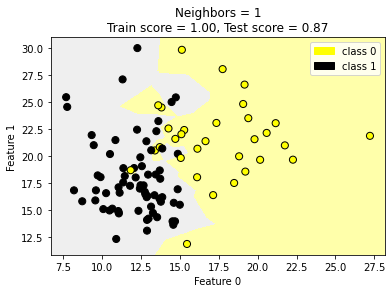

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


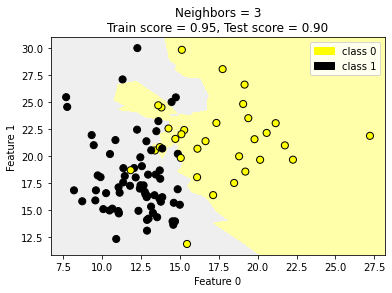

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


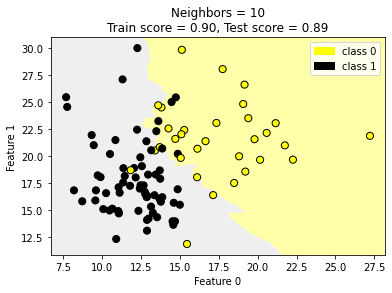

In [27]:
cancer_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, random_state=42)

for neighbor in [1,3,10]:
    plot_two_class_knn(X_train[:100,:2],y_train[:100], neighbor, X_test[:100,:2], y_test[:100])


## KNN Regression

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 100, n_features=1,
                        n_informative=1, bias = 150.0,
                        noise = 30, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

knnreg = KNeighborsRegressor().fit(X_train, y_train)

# Compare with linear regssion
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)

print("KNN regression test set score (R^2): {:.3f}".format(knnreg.score(X_test, y_test)))
print("Linear regression test set score (R^2): {:.3f}".format(linreg.score(X_test, y_test)))


KNN regression test set score (R^2): 0.609
Linear regression test set score (R^2): 0.714


In [46]:
def plot_knn_reg_3_subplots(X, y, X_test, y_test, neighbors, figsize=(18,4)):
    fig, axes = plt.subplots(1, 3, figsize=figsize)
    x_min = X.min()
    x_max = X.max()
    line = np.linspace(x_min, x_max, 1000).reshape(-1,1)
    
    for n, ax in zip(neighbors, axes):
        knnreg = KNeighborsRegressor(n_neighbors=n).fit(X, y)
        ax.plot(line, knnreg.predict(line), c='k')
        ax.plot(X, y, '^', c='b', markersize=8)
        ax.plot(X_test, y_test, 'v', c='r', markersize=8)
        
        ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n, knnreg.score(X, y), knnreg.score(X_test, y_test)))
        ax.set_xlabel("Feature")
        ax.set_ylabel("Target")
    axes[0].legend(["Model prediction", "Training target", "Test target"], loc="best")
    

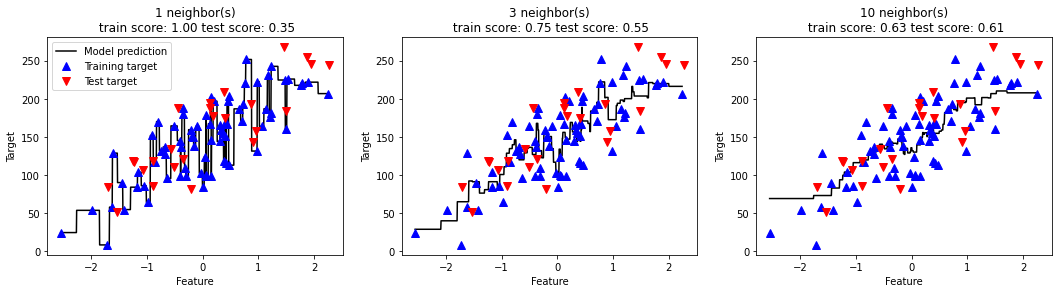

In [47]:
plot_knn_reg_3_subplots(X_train, y_train, X_test, y_test, [1,3,10])